In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

In [3]:
insurance= pd.read_csv("insurance.csv")
df=insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.isna().sum() #dataset içerisinde  Nan değer olup olmadığını kontrol ettik

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [7]:
df["sex"]=df["sex"].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   object  
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 64.3+ KB


>**Kadın ve erkek çoğunluğunu gösteren grafik**

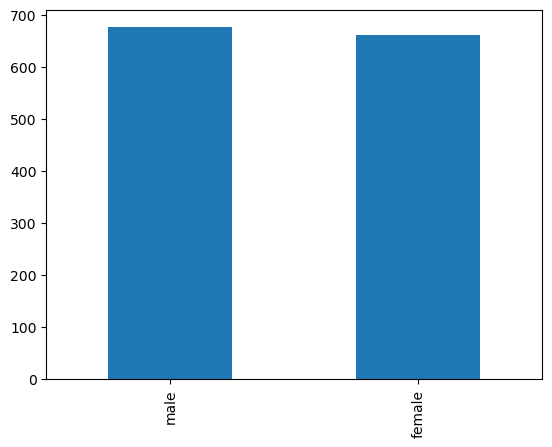

In [9]:
df["sex"].value_counts().plot.bar(); 


In [10]:
df[df["bmi"]<18.5].value_counts()



age  sex     bmi     children  smoker  region     charges    
18   male    15.960  0         no      northeast  1694.79640     1
             17.290  2         yes     northeast  12829.45510    1
57   male    18.335  0         no      northeast  11534.87265    1
52   female  18.335  0         no      northwest  9991.03765     1
51   female  18.050  0         no      northwest  9644.25250     1
39   female  18.300  5         yes     southwest  19023.26000    1
38   male    16.815  2         no      northeast  6640.54485     1
37   female  17.290  2         no      northeast  6877.98010     1
35   male    17.860  1         no      northwest  5116.50040     1
32   female  17.765  2         yes     northwest  32734.18630    1
28   female  17.290  0         no      northeast  3732.62510     1
27   female  17.955  2         yes     northeast  15006.57945    1
26   male    17.670  0         no      northwest  2680.94930     1
     female  17.195  2         yes     northeast  14455.64405    1


 >**Cinsiyetlerin dağılımı**

In [11]:
df[df["bmi"]<18.5]["sex"].unique()
df[df["bmi"]<18.5]["sex"].value_counts().values


array([12,  8], dtype=int64)

>**Erkek ve kadınların bmi değerlerine göre sınıflandırılması**

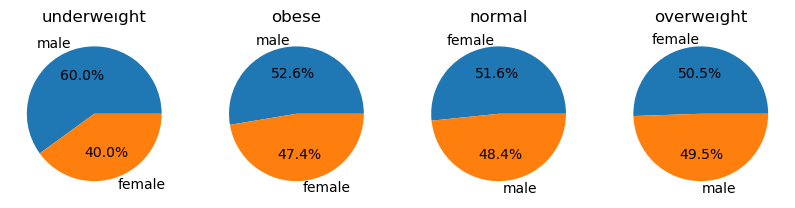

In [68]:
 #underweıght
labels = df[df["bmi"]<18.5]["sex"].unique()
sizes = df[df["bmi"]<18.5]["sex"].value_counts().values
#obes
labels2 = df[df["bmi"]>30]["sex"].unique()
sizes2 = df[df["bmi"]>30]["sex"].value_counts().values
#normal
labels3 = df[(df["bmi"]<30) & (df["bmi"]>18.5) ]["sex"].unique()
sizes3 = df[(df["bmi"]<30) & (df["bmi"]>18.5) ]["sex"].value_counts().values
#şişman
labels4 = df[(df["bmi"]<29.9) & (df["bmi"]>25) ]["sex"].unique()
sizes4 = df[(df["bmi"]<29.9) & (df["bmi"]>25) ]["sex"].value_counts().values

fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(10,10))
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%');
ax[1].pie(sizes2, labels=labels2, autopct='%1.1f%%');
ax[2].pie(sizes3, labels=labels3, autopct='%1.1f%%');
ax[3].pie(sizes4, labels=labels4, autopct='%1.1f%%');


ax[0].set_title("underweıght");
ax[1].set_title("obese");
ax[2].set_title("normal");
ax[3].set_title("overweıght");


>**Yerleşim bölgelerindeki insan çoğunluğunu gösteren grafik**

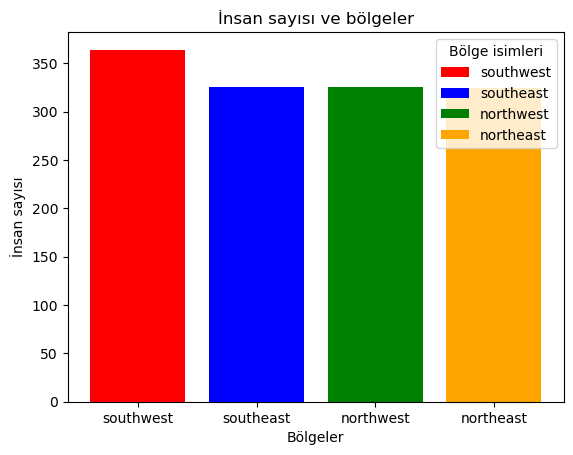

In [73]:
fig, ax = plt.subplots()

region = df["region"].unique()
counts = df["region"].value_counts().values
bar_labels =df["region"].unique()
bar_colors = ["red", "blue", "green", "orange"]

ax.bar(region, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('İnsan sayısı')
ax.set_xlabel('Bölgeler')
ax.set_title('İnsan sayısı ve bölgeler')
ax.legend(title='Bölge isimleri')

plt.show()              

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df["smoker"]=df["smoker"].astype("category")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 55.2+ KB


In [16]:
df[["region","children"]].value_counts()

region     children
southeast  0           157
northeast  0           147
southwest  0           138
northwest  0           132
southeast  1            95
southwest  1            78
northeast  1            77
northwest  1            74
           2            66
southeast  2            66
southwest  2            57
northeast  2            51
northwest  3            46
northeast  3            39
southwest  3            37
southeast  3            35
southwest  5             8
northeast  4             7
southwest  4             7
northwest  4             6
southeast  5             6
           4             5
northeast  5             3
northwest  5             1
dtype: int64

**Çocuk çoğunluğununa göre bölgelerin sınıflandırılması**

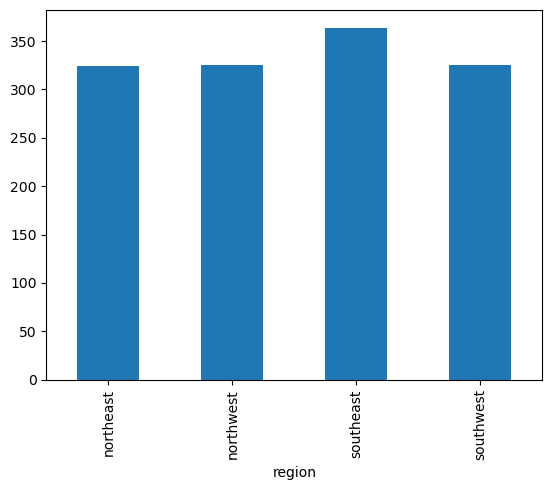

In [17]:
df.groupby(["region"]).count()["children"].plot.bar(); 

In [18]:
#df.groupby(["region"]).count()["children"]

> **BÖLGELERE GÖRE ÇOCUK SAHİBİ OLAN/OLMAYAN AİLE SAYILARI**


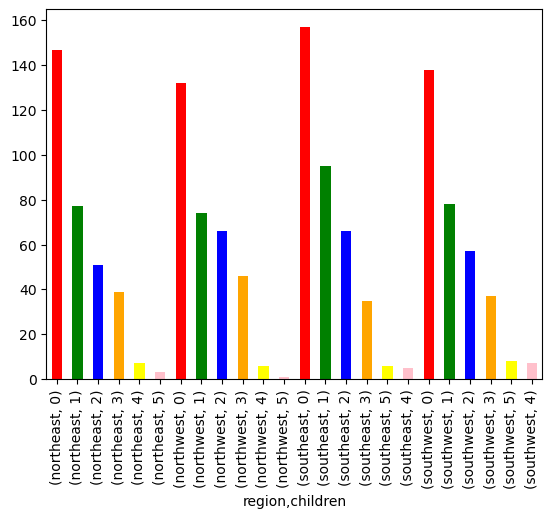

In [19]:
df[["region","children"]].set_index("region").groupby("region").value_counts().plot.bar(color=["red","green","blue","orange","yellow","pink"]);


In [20]:
 #df[["region","children"]].groupby("region").value_counts()

In [21]:
#df[["region","children"]].set_index("region").loc["southwest"]


In [22]:
newdf=df.groupby(["region"]).count()[["children"]]

In [23]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
df[["bmi","charges"]].value_counts

<bound method DataFrame.value_counts of          bmi      charges
0     27.900  16884.92400
1     33.770   1725.55230
2     33.000   4449.46200
3     22.705  21984.47061
4     28.880   3866.85520
...      ...          ...
1333  30.970  10600.54830
1334  31.920   2205.98080
1335  36.850   1629.83350
1336  25.800   2007.94500
1337  29.070  29141.36030

[1338 rows x 2 columns]>

In [25]:
df[df["bmi"]>30][["charges"]]

,charges
1,1725.55230
2,4449.46200
6,8240.58960
12,1826.84300
13,11090.71780
...,...
1331,10795.93733
1332,11411.68500
1333,10600.54830
1334,2205.98080


In [26]:
df[df["bmi"]<18.5][["charges"]].sort_values(by="charges").head()

,charges
410,1621.3402
172,1694.7964
232,1727.7850
680,2585.2690
821,2680.9493


<Axes: >

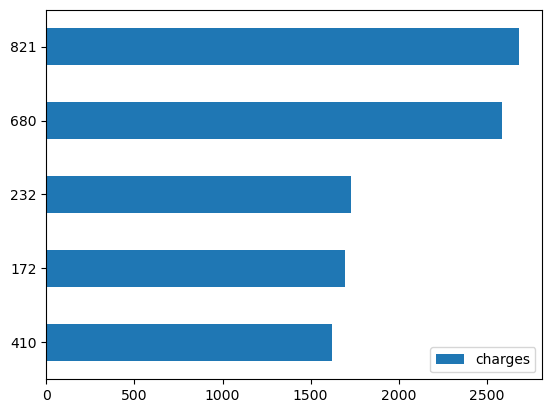

In [27]:
df[df["bmi"]<18.5][["charges"]].sort_values(by="charges").head().plot.barh()

In [28]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='region,smoker'>

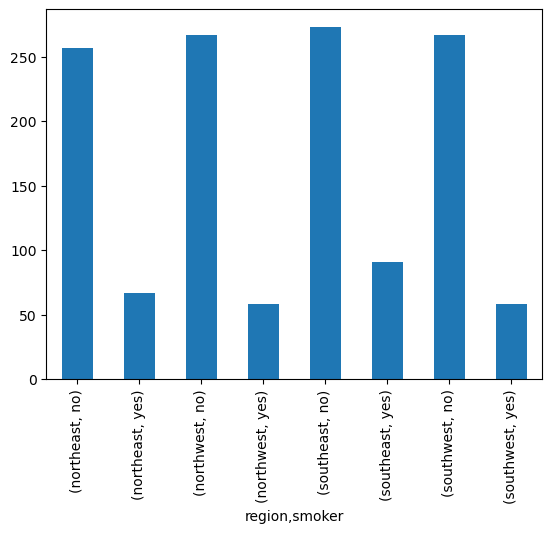

In [29]:
df[["region","smoker"]].groupby("region").value_counts().plot.bar() #sigara içenler ve bölgeler arasındaki ilişki

In [30]:
df[["sex","bmi"]]["sex"].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [31]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


> **dataframein bir kopyasını oluşturarak önceki veriye herhangi bir şey olmaması için koruma altına aldım**

In [32]:
newdf=df.copy()

> **Sonraki işlemimde kullanmak için yeni bir sütun oluşturdum. Bu sütunu daha sonra fonksiyondan hesapladığım değerleri atayacağım.**


In [33]:
newdf["bmi_values"]="NaN"

> BMİ sayısal değerleri üzerinden fonksiyon yazıp hesaplama yaptım ve **zayıf-normal-şişman-obez** olarak kategorize ettim.

In [34]:
def bmi():
    bmi_list=list()
    for i in newdf["bmi"]:
        if i < 18.5:
            bmi_list.append("Zayıf")
        elif (i > 18.5)&(i<24.9):
            bmi_list.append("Normal")
        elif (i > 25)&(i<29.9):
            bmi_list.append("Şişman")
        elif (i > 30)&(i<34.9):
            bmi_list.append("Obez")
        else:
            bmi_list.append("Obez")
            
    return bmi_list

newdf["bmi_values"]=bmi()

In [35]:
newdf

,age,sex,bmi,children,smoker,region,charges,bmi_values
0,19,female,27.900,0,yes,southwest,16884.92400,Şişman
1,18,male,33.770,1,no,southeast,1725.55230,Obez
2,28,male,33.000,3,no,southeast,4449.46200,Obez
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Şişman
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obez
1334,18,female,31.920,0,no,northeast,2205.98080,Obez
1335,18,female,36.850,0,no,southeast,1629.83350,Obez
1336,21,female,25.800,0,no,southwest,2007.94500,Şişman


>  2 markdown arasında deneme amaçlı bazı kodlar yazdım. Geçebiliriz :)
----------------------------------------------------------------------------

In [36]:
#newdf[["bmi_values","sex"]].groupby("sex").value_counts().loc["male"].plot.barh().set_title("WOMAN BMI");


In [37]:

#newdf[["bmi_values","sex"]].groupby("sex").value_counts().loc["female"].plot.barh().set_title("MAN BMI");

In [38]:

#newdf[["bmi_values","sex"]].groupby("sex").value_counts()

In [39]:
#newdf["sex"].unique()[0]

In [40]:
#newdf[["bmi_values","sex"]].groupby("sex").value_counts().to_dict()

In [41]:
#newdf[["bmi_values","sex"]].groupby("sex").value_counts().to_dict().keys()

>  *********************************************************************************


> **BMİ Değerlerine göre Obez,şişman,normal,zayıf olmak üzere 4 kategorideki insanların sayıca değerlerini gösterdiğim grafik**

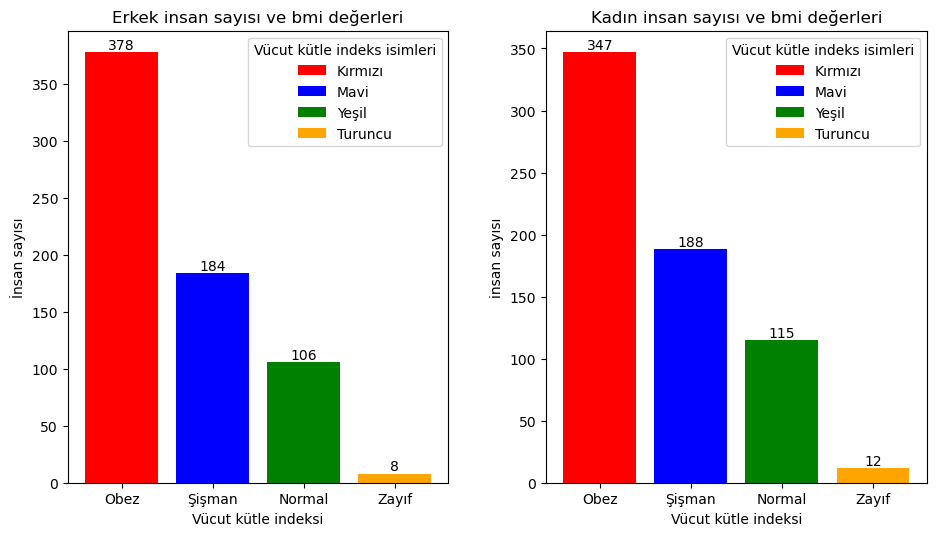

In [42]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

male_bmi_values = newdf[["bmi_values","sex"]].groupby("sex").value_counts().loc["male"].index
male_counts = newdf[["bmi_values","sex"]].groupby("sex").value_counts().loc["male"].values
bar_labels=["Kırmızı", "Mavi", "Yeşil", "Turuncu"]
bar_color=["red", "blue", "green", "orange"]

#bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

#Male
ax[0].bar(male_bmi_values, male_counts, label=bar_labels,color=bar_color)
ax[0].set_ylabel('İnsan sayısı')
ax[0].set_xlabel('Vücut kütle indeksi')
ax[0].set_title('Erkek insan sayısı ve bmi değerleri')
ax[0].legend(title='Vücut kütle indeks isimleri')

bar_container = ax[0].bar(male_bmi_values, male_counts,color=bar_color)
ax[0].bar_label(bar_container, fmt='{:,.0f}')

#Female
female_bmi_values = newdf[["bmi_values","sex"]].groupby("sex").value_counts().loc["female"].index
female_counts = newdf[["bmi_values","sex"]].groupby("sex").value_counts().loc["female"].values

bar_container = ax[1].bar(female_bmi_values, female_counts)
ax[1].bar_label(bar_container, fmt='{:,.0f}')

ax[1].bar(female_bmi_values, female_counts, label=bar_labels, color=bar_color)
#ax[1].set_yticks(Female_counts)
ax[1].set_ylabel('insan sayısı')
ax[1].set_xlabel('Vücut kütle indeksi')
ax[1].set_title('Kadın insan sayısı ve bmi değerleri')
ax[1].legend(title='Vücut kütle indeks isimleri')
plt.tight_layout(pad=3)


In [43]:
#newdf[["bmi_values","sex"]].groupby("sex").value_counts().loc["male"].values

In [44]:
#newdf[["bmi_values","sex"]].groupby("sex").value_counts().loc["male"].index

In [45]:
#newdf[["bmi_values","sex"]].groupby("sex").value_counts().loc["female"].values

In [46]:
#newdf[["smoker","charges"]].groupby("smoker").value_counts().loc["yes"]


>**Bu kısımda Ana dataframeden istediğim sütunları filtreliyorum bu kısımda erkek ve kadının yapmış olduğu maximum harcamaları tespit edip tablolaştıracağım**

In [47]:
df2=df[["age","sex","charges"]]

In [48]:
df2

,age,sex,charges
0,19,female,16884.92400
1,18,male,1725.55230
2,28,male,4449.46200
3,33,male,21984.47061
4,32,male,3866.85520
...,...,...,...
1333,50,male,10600.54830
1334,18,female,2205.98080
1335,18,female,1629.83350
1336,21,female,2007.94500


> **Oluşturmuş olduğum df2 adındaki dataframe üzerinde filtreleme işlemi yaptığımda maximum harcama yapan kişinin 54 yaşında bir kadın olduğunu görüyorum**

In [49]:
maxMaleCharges=df2[df2["charges"].max()==df2["charges"]]

In [50]:
maxMaleCharges

,age,sex,charges
543,54,female,63770.42801


> **Yukarıdaki filtremele işleminin doğruluğu teyit etme amacıyla yapmış olduğum filtreleme**

In [51]:
df2[(df2["sex"]=="female") & (df2["charges"]==df2["charges"].max())]

,age,sex,charges
543,54,female,63770.42801


In [52]:
maledf=df2[df2["sex"]=="male"]
femaledf=df2[df2["sex"]=="female"]

In [53]:
maledf[maledf["charges"]==maledf["charges"].max()]

,age,sex,charges
1300,45,male,62592.87309


In [54]:
femaledf[femaledf["charges"]==femaledf["charges"].max()]

,age,sex,charges
543,54,female,63770.42801


>**Kolaylık olması açısından cinsiyetleri tek tek df içinden çektim.**

In [55]:
maledf=df[df["sex"]=="male"]
femaledf=df[df["sex"]=="female"]

>**Kadın ve erkek maximum harcamalarını filtreleyerek elde ettim daha sonra concat metodu ile elde ettiğim verileri birleştirdim**

In [56]:
maleValue=maledf[maledf["charges"]==maledf["charges"].max()]

In [57]:
femaleValue=femaledf[femaledf["charges"]==femaledf["charges"].max()]

In [58]:
maleAndFemale=pd.concat([femaleValue,maleValue],axis=0)

>**charges olan sütun ismini max_charges olarak güncelledim**

In [59]:
#maleAndFemale.drop(columns=["children","smoker","region","bmi"],axis=0,inplace=True)
maleAndFemale.columns=["age","sex","bmi","children","smoker","region","max_charges"]

In [60]:
maleAndFemale # cinsiyetlere göre en fazla harcama yapan kişinin yaşı,cinsiyeti,bmi,sigara,bölge ve harcama değerleri

,age,sex,bmi,children,smoker,region,max_charges
543,54,female,47.41,0,yes,southeast,63770.42801
1300,45,male,30.36,0,yes,southeast,62592.87309


>**Bölgelerdeki kadın ve erkek harcamalarının toplamlarını bir bar grafikte göstermek amacıyla verileri bölgelere göre grupladım**

In [61]:
region_male_charges=df[["sex","region","charges"]].set_index("sex").loc["male"].groupby("region").sum()

In [62]:
region_female_charges=df[["sex","region","charges"]].set_index("sex").loc["female"].groupby("region").sum()

In [63]:
region_male_charges

,charges
region,
northeast,2.258203e+06
northwest,1.989013e+06
southeast,3.001248e+06
southwest,2.186300e+06


In [64]:
region_female_charges

,charges
region,
northeast,2.085466e+06
northwest,2.046699e+06
southeast,2.362442e+06
southwest,1.826455e+06


In [65]:
group_charges=pd.concat([region_male_charges,region_female_charges],axis=1)

In [66]:
group_charges.columns=["male_charges","female_charges"]

> **Daha sonra concat metodu ile elde ettiğim verileri birleştirerek bar grafik üzerinde gösterdim**

> **bölgelere göre cinsiyetlerin yapmış oldukları harcamalar**


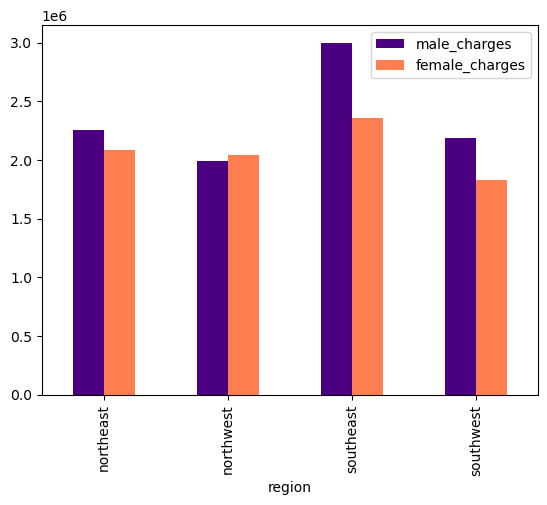

In [67]:
group_charges.plot.bar(color=["Indigo","coral"]); 